In [1]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os



width = 4  # Because it looks good
fontsize = 12
rc = {'figure.figsize': (width, width),
      'font.size': fontsize,
      'axes.labelsize': fontsize,
      'axes.titlesize': fontsize,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize,
      'legend.fontsize': fontsize-2.5}
sns.set(rc=rc)
sns.set_style('ticks')

## 2) VibraCLIP Performance with Molecular Mass

Retrieval accuracy of VibraCLIP as a function of top-K and percentage of missing IR data. 

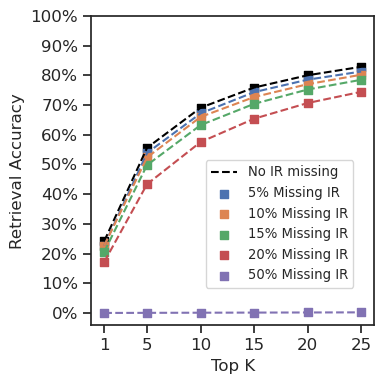

In [8]:
# IR data
ir_dict_ref = {'1': 0.24166078015854328, '5': 0.5560003139470999, '10': 0.6909975669099757, '15': 0.7590456008162625, '20': 0.8004081312298877, '25': 0.8288988305470528}
ir_dict_5 = {'1': 0.22674829291264423, '5': 0.5387332234518484, '10': 0.6720822541401774, '15': 0.7435837061455145, '20': 0.7855741307589671, '25': 0.8129660152264343}
ir_dict_10 = {'1': 0.2266698061376658, '5': 0.5238207362059493, '10': 0.6600737775684797, '15': 0.7271014834000471, '20': 0.7703476964131544, '25': 0.8022133270543913}
ir_dict_15 = {'1': 0.2057923239934071, '5': 0.4979985872380504, '10': 0.6326034063260341, '15': 0.7041833451063496, '20': 0.7524527117180755, '25': 0.785181696884075}
ir_dict_20 =  {'1': 0.17172906365277452, '5': 0.43363943175574915, '10': 0.5755435209167256, '15': 0.6541087826701201, '20': 0.7069303822305941, '25': 0.7446040342202339}
ir_dict_50 = {'1': 7.848677497841614e-05, '5': 0.0003924338748920807, '10': 0.0008633545247625775, '15': 0.0012557883996546582, '20': 0.0016482222745467388, '25': 0.0020406561494388195}
 
ref_keys = sorted([int(k) for k in ir_dict_ref.keys()])
ref_vals = [ir_dict_ref[str(k)] for k in ref_keys]
plt.plot(ref_keys, ref_vals, "--", color="black", label="No IR missing")
plt.scatter(ref_keys, ref_vals, color="black", marker='s')

ir_dicts = {
    "5% Missing IR": ir_dict_5,
    "10% Missing IR": ir_dict_10,
    "15% Missing IR": ir_dict_15,
    "20% Missing IR": ir_dict_20,
    "50% Missing IR": ir_dict_50
}


for label, data in ir_dicts.items():
    keys = sorted([int(k) for k in data.keys()])
    values = [data[str(k)] for k in keys]
    plt.plot(keys, values, "--")
    plt.scatter(keys, values, label=label, marker='s')

# Plot  
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(y * 100)}%" for y in np.arange(0, 1.1, 0.1)])
plt.xticks(ref_keys)
plt.xlabel("Top K")
plt.ylabel("Retrieval Accuracy")
plt.legend(loc="lower right", bbox_to_anchor=(0.95, 0.10))
plt.title("")
plt.tight_layout()

# save
#save_path = "/home/cloconte/Desktop/ICIQ/Projects/vibraclip-dev/notebooks/raman_plot_retrieval_acc.jpg"
#os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig("./missing_data_ir.svg")
plt.show()

## 3) VibraCLIP Performance with Molecular Mass

Retrieval accuracy of VibraCLIP as a function of top-K and percentage of missing Raman data. 

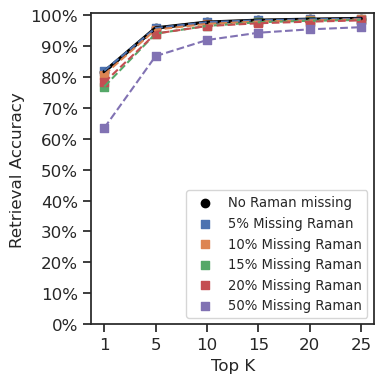

In [5]:
# Raman data
raman_dict_ref = {'1': 0.8167333804253983, '5': 0.957931088611569, '10': 0.976610941056432, '15': 0.9828113962797269, '20': 0.986029354053842, '25': 0.9885409308531512}  
raman_dict_5 = {'1': 0.8201083117494702, '5': 0.957931088611569, '10': 0.9767679146063888, '15': 0.9829683698296837, '20': 0.9861078408288203, '25': 0.9881484969782591}
raman_dict_10 = {'1': 0.80723648065301, '5': 0.9525155011380583, '10': 0.9712738403578997, '15': 0.9789655443057845, '20': 0.9824974491798132, '25': 0.9856369201789499}
raman_dict_15 = {'1': 0.7684640138136724, '5': 0.9398791303665333, '10': 0.9647594380346911, '15': 0.976610941056432, '20': 0.9813986343301154, '25': 0.9840671846793815}
raman_dict_20 = {'1': 0.7818067655600032, '5': 0.9399576171415116, '10': 0.9642885173848207, '15': 0.9733929832823169, '20': 0.9785731104308923, '25': 0.98265442272977}
raman_dict_50 = {'1': 0.6346440624754729, '5': 0.8671218899615415, '10': 0.9191586217722314, '15': 0.9427046542657562, '20': 0.9536928027627345, '25': 0.9606781257358136}

# Plot 
ref_keys = list(raman_dict_ref.keys())
ref_vals = list(raman_dict_ref.values())
plt.plot(ref_keys, ref_vals, "-", color="black", linewidth=2.5)
plt.scatter(ref_keys, ref_vals, color="black", label="No Raman missing", marker='o')
raman_dicts = {
    "5% Missing Raman": raman_dict_5,
    "10% Missing Raman": raman_dict_10,
    "15% Missing Raman": raman_dict_15,
    "20% Missing Raman": raman_dict_20,
    "50% Missing Raman": raman_dict_50,
}


for label, data in raman_dicts.items():
    keys = list(data.keys())
    values = list(data.values())
    plt.plot(keys, values, "--")
    plt.scatter(keys, values, label=label, marker='s')
    # Updated line: solid line and thicker

 
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(ytick * 100)}%" for ytick in np.arange(0, 1.1, 0.1)])
plt.xlabel("Top K")
plt.ylabel("Retrieval Accuracy")
plt.legend(loc="lower right")
plt.title("")
 
# Save 
#save_path = "/home/cloconte/Desktop/ICIQ/Projects/vibraclip-dev/notebooks/raman_plot_retrieval_acc.jpg"
#os.makedirs(os.path.dirname(save_path), exist_ok=True)

plt.tight_layout()
plt.savefig("./missing_data_raman.png", dpi=300)   
plt.show()